## Importando bibliotecas

In [19]:
#!pip install sidrapy

In [23]:
import sidrapy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Coleta dos dados

In [4]:
#/t/1737/n1/all/v/2265/p/all/d/v2265%202
ipca_raw = sidrapy.get_table(table_code = "1737",
                             territorial_level = "1",
                             ibge_territorial_code = "all",
                             variable = "2265",
                             period = "all",
                             header = "n")
ipca_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,,,...,1,Brasil,197912,dezembro 1979,2265,IPCA - Variação acumulada em 12 meses
1,1,Brasil,,,...,1,Brasil,198001,janeiro 1980,2265,IPCA - Variação acumulada em 12 meses
2,1,Brasil,,,...,1,Brasil,198002,fevereiro 1980,2265,IPCA - Variação acumulada em 12 meses
3,1,Brasil,,,...,1,Brasil,198003,março 1980,2265,IPCA - Variação acumulada em 12 meses
4,1,Brasil,,,...,1,Brasil,198004,abril 1980,2265,IPCA - Variação acumulada em 12 meses
...,...,...,...,...,...,...,...,...,...,...,...
512,1,Brasil,2,%,8.73,1,Brasil,202208,agosto 2022,2265,IPCA - Variação acumulada em 12 meses
513,1,Brasil,2,%,7.17,1,Brasil,202209,setembro 2022,2265,IPCA - Variação acumulada em 12 meses
514,1,Brasil,2,%,6.47,1,Brasil,202210,outubro 2022,2265,IPCA - Variação acumulada em 12 meses
515,1,Brasil,2,%,5.90,1,Brasil,202211,novembro 2022,2265,IPCA - Variação acumulada em 12 meses


## Tratamento e limpeza

### Realiza a limpeza e manipulação da tabela

In [5]:
ipca = (ipca_raw.loc[0:, ["V", "D2C"]] \
                .rename(columns = {"V": "ipca",
                                   "D2C": "date"}))
ipca

,ipca,date
0,...,197912
1,...,198001
2,...,198002
3,...,198003
4,...,198004
...,...,...
512,8.73,202208
513,7.17,202209
514,6.47,202210
515,5.90,202211


### Filtra os dados que não tem nada e estão atrapalhando no astype

In [6]:
ipca = ipca.loc[ipca.date >= "2004-01-01"]
ipca

,ipca,date
289,7.71,200401
290,6.69,200402
291,5.89,200403
292,5.26,200404
293,5.15,200405
...,...,...
512,8.73,202208
513,7.17,202209
514,6.47,202210
515,5.90,202211


### Transforma a coluna date em tipo datetime

In [7]:
ipca["date"] = pd.to_datetime(ipca["date"],
                              format = "%Y%m")
ipca

C:\Users\bruno\AppData\Local\Temp\ipykernel_36724\1398619951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca["date"] = pd.to_datetime(ipca["date"],


,ipca,date
289,7.71,2004-01-01
290,6.69,2004-02-01
291,5.89,2004-03-01
292,5.26,2004-04-01
293,5.15,2004-05-01
...,...,...
512,8.73,2022-08-01
513,7.17,2022-09-01
514,6.47,2022-10-01
515,5.90,2022-11-01


### Transforma a coluna ipca em tipo float

In [8]:
ipca["ipca"] = ipca["ipca"].astype(float)
ipca

C:\Users\bruno\AppData\Local\Temp\ipykernel_36724\737223425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca["ipca"] = ipca["ipca"].astype(float)


,ipca,date
289,7.71,2004-01-01
290,6.69,2004-02-01
291,5.89,2004-03-01
292,5.26,2004-04-01
293,5.15,2004-05-01
...,...,...
512,8.73,2022-08-01
513,7.17,2022-09-01
514,6.47,2022-10-01
515,5.90,2022-11-01


## Permite calcular os cinco números dos valores do IPCA

In [9]:
ipca.describe()

,ipca
count,228.000000
mean,5.841009
std,2.177011
min,1.880000
25%,4.310000
50%,5.735000
75%,6.752500
max,12.130000


## Exploração dos dados

<AxesSubplot:xlabel='date', ylabel='ipca'>

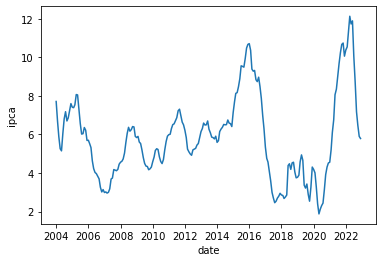

In [10]:
sns.lineplot(x = "date",
             y = "ipca",
             data = ipca)

<AxesSubplot:xlabel='ipca', ylabel='Count'>

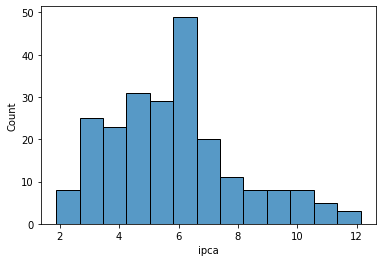

In [11]:
sns.histplot(x = "ipca",
             data = ipca)

<AxesSubplot:ylabel='ipca'>

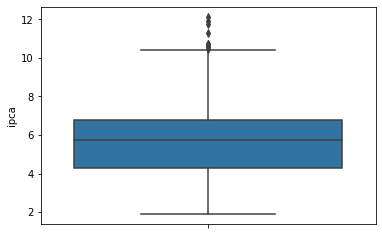

In [12]:
sns.boxplot(y = "ipca",
            data = ipca)

## Buscando dados da desocupação

In [13]:
# /t/6381/n1/all/v/4099/p/all/d/v4099%201

desocupacao_raw = sidrapy.get_table(table_code = "6381",
                                    territorial_level = "1",
                                    ibge_territorial_code = "all",
                                    variable = "4099",
                                    period = "all",
                                    header = "n")

desocupacao_raw

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,1,Brasil,2,%,8.0,1,Brasil,201203,jan-fev-mar 2012,4099,"Taxa de desocupação, na semana de referência, ..."
1,1,Brasil,2,%,7.8,1,Brasil,201204,fev-mar-abr 2012,4099,"Taxa de desocupação, na semana de referência, ..."
2,1,Brasil,2,%,7.7,1,Brasil,201205,mar-abr-mai 2012,4099,"Taxa de desocupação, na semana de referência, ..."
3,1,Brasil,2,%,7.6,1,Brasil,201206,abr-mai-jun 2012,4099,"Taxa de desocupação, na semana de referência, ..."
4,1,Brasil,2,%,7.5,1,Brasil,201207,mai-jun-jul 2012,4099,"Taxa de desocupação, na semana de referência, ..."
...,...,...,...,...,...,...,...,...,...,...,...
124,1,Brasil,2,%,9.1,1,Brasil,202207,mai-jun-jul 2022,4099,"Taxa de desocupação, na semana de referência, ..."
125,1,Brasil,2,%,8.9,1,Brasil,202208,jun-jul-ago 2022,4099,"Taxa de desocupação, na semana de referência, ..."
126,1,Brasil,2,%,8.7,1,Brasil,202209,jul-ago-set 2022,4099,"Taxa de desocupação, na semana de referência, ..."
127,1,Brasil,2,%,8.3,1,Brasil,202210,ago-set-out 2022,4099,"Taxa de desocupação, na semana de referência, ..."


## Tratamento e limpeza

In [14]:
desocupacao = (desocupacao_raw.loc[0:, ["V", "D2C"]] \
                              .rename(columns = {"V": "desocupacao", "D2C": "date"}))
desocupacao

,desocupacao,date
0,8.0,201203
1,7.8,201204
2,7.7,201205
3,7.6,201206
4,7.5,201207
...,...,...
124,9.1,202207
125,8.9,202208
126,8.7,202209
127,8.3,202210


### Transforma a coluna date em tipo datetime

In [15]:
desocupacao["date"] = pd.to_datetime(desocupacao["date"],
                                     format = "%Y%m")
desocupacao

,desocupacao,date
0,8.0,2012-03-01
1,7.8,2012-04-01
2,7.7,2012-05-01
3,7.6,2012-06-01
4,7.5,2012-07-01
...,...,...
124,9.1,2022-07-01
125,8.9,2022-08-01
126,8.7,2022-09-01
127,8.3,2022-10-01


### Transforma a coluna desocupacao em tipo float

In [16]:
desocupacao["desocupacao"] = desocupacao["desocupacao"].astype(float)

### Juntando os dados

In [17]:
df = pd.merge(ipca, desocupacao, on = "date")
df

,ipca,date,desocupacao
0,5.24,2012-03-01,8.0
1,5.10,2012-04-01,7.8
2,4.99,2012-05-01,7.7
3,4.92,2012-06-01,7.6
4,5.20,2012-07-01,7.5
...,...,...,...
124,10.07,2022-07-01,9.1
125,8.73,2022-08-01,8.9
126,7.17,2022-09-01,8.7
127,6.47,2022-10-01,8.3


## Modelagem

### Gráfico

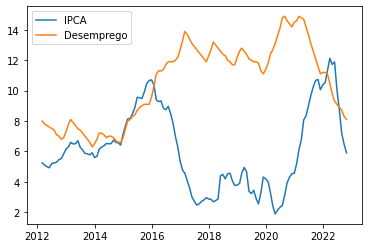

In [22]:
plt.plot("date",
         "ipca",
         data = df,
         label = "IPCA")

plt.plot("date",
         "desocupacao",
         data = df,
         label = "Desemprego")

plt.legend()
plt.show()

### Regressão linear

In [25]:
modelo = smf.ols("ipca ~ desocupacao", data = df).fit()
modelo.params

Intercept      9.390786
desocupacao   -0.309085
dtype: float64

In [27]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ipca   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.31
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           0.000384
Time:                        18:09:09   Log-Likelihood:                -300.79
No. Observations:                 129   AIC:                             605.6
Df Residuals:                     127   BIC:                             611.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.3908      0.920     10.210      0.000       7.571      11.211
desocupacao    -0.3091      0.085     -3.649      0.000      -0.477      -0.141
==============================================================================
Omnibus:                       16.039   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.298
Skew:                           0.774   Prob(JB):                     0.000476
Kurtosis:                       2.327   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='desocupacao', ylabel='ipca'>

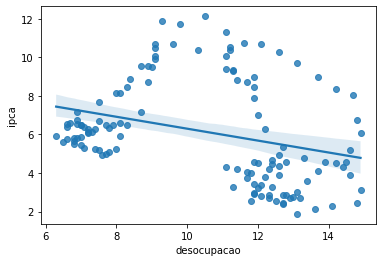

In [30]:
sns.regplot(x = "desocupacao",
            y = "ipca",
            data = df)